In [2]:
# (a)

!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 575.3 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 330.7 kB/s eta 0:00:00a 0:00:01
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=0db6322e148a14bb36790bbb2f5edbbb54f610d07fc3e5199095271ae606260b
  Stored in directory: /Users/sammm/Library/Caches/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [3]:
from ISLP import load_data
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

Boston = load_data('Boston')

In [4]:
# (b)
print("Rows:", Boston.shape[0])
print("Columns:", Boston.shape[1])
Boston.head()

Rows: 506
Columns: 13


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


1. CRIM : per capita crime rate by town
2. ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX : nitric oxides concentration (parts per 10 million)
6. RM : average number of rooms per dwelling
7. AGE : proportion of owner-occupied units built prior to 1940
8. DIS : weighted distances to five Boston employment centres
9. RAD : index of accessibility to radial highways
10. TAX : full-value property-tax rate per $10,000
11. PTRATIO : pupil-teacher ratio by town
12. LSTAT % : lower status of the population
13. MEDV : median value of owner-occupied homes in $1000's
resource:https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names

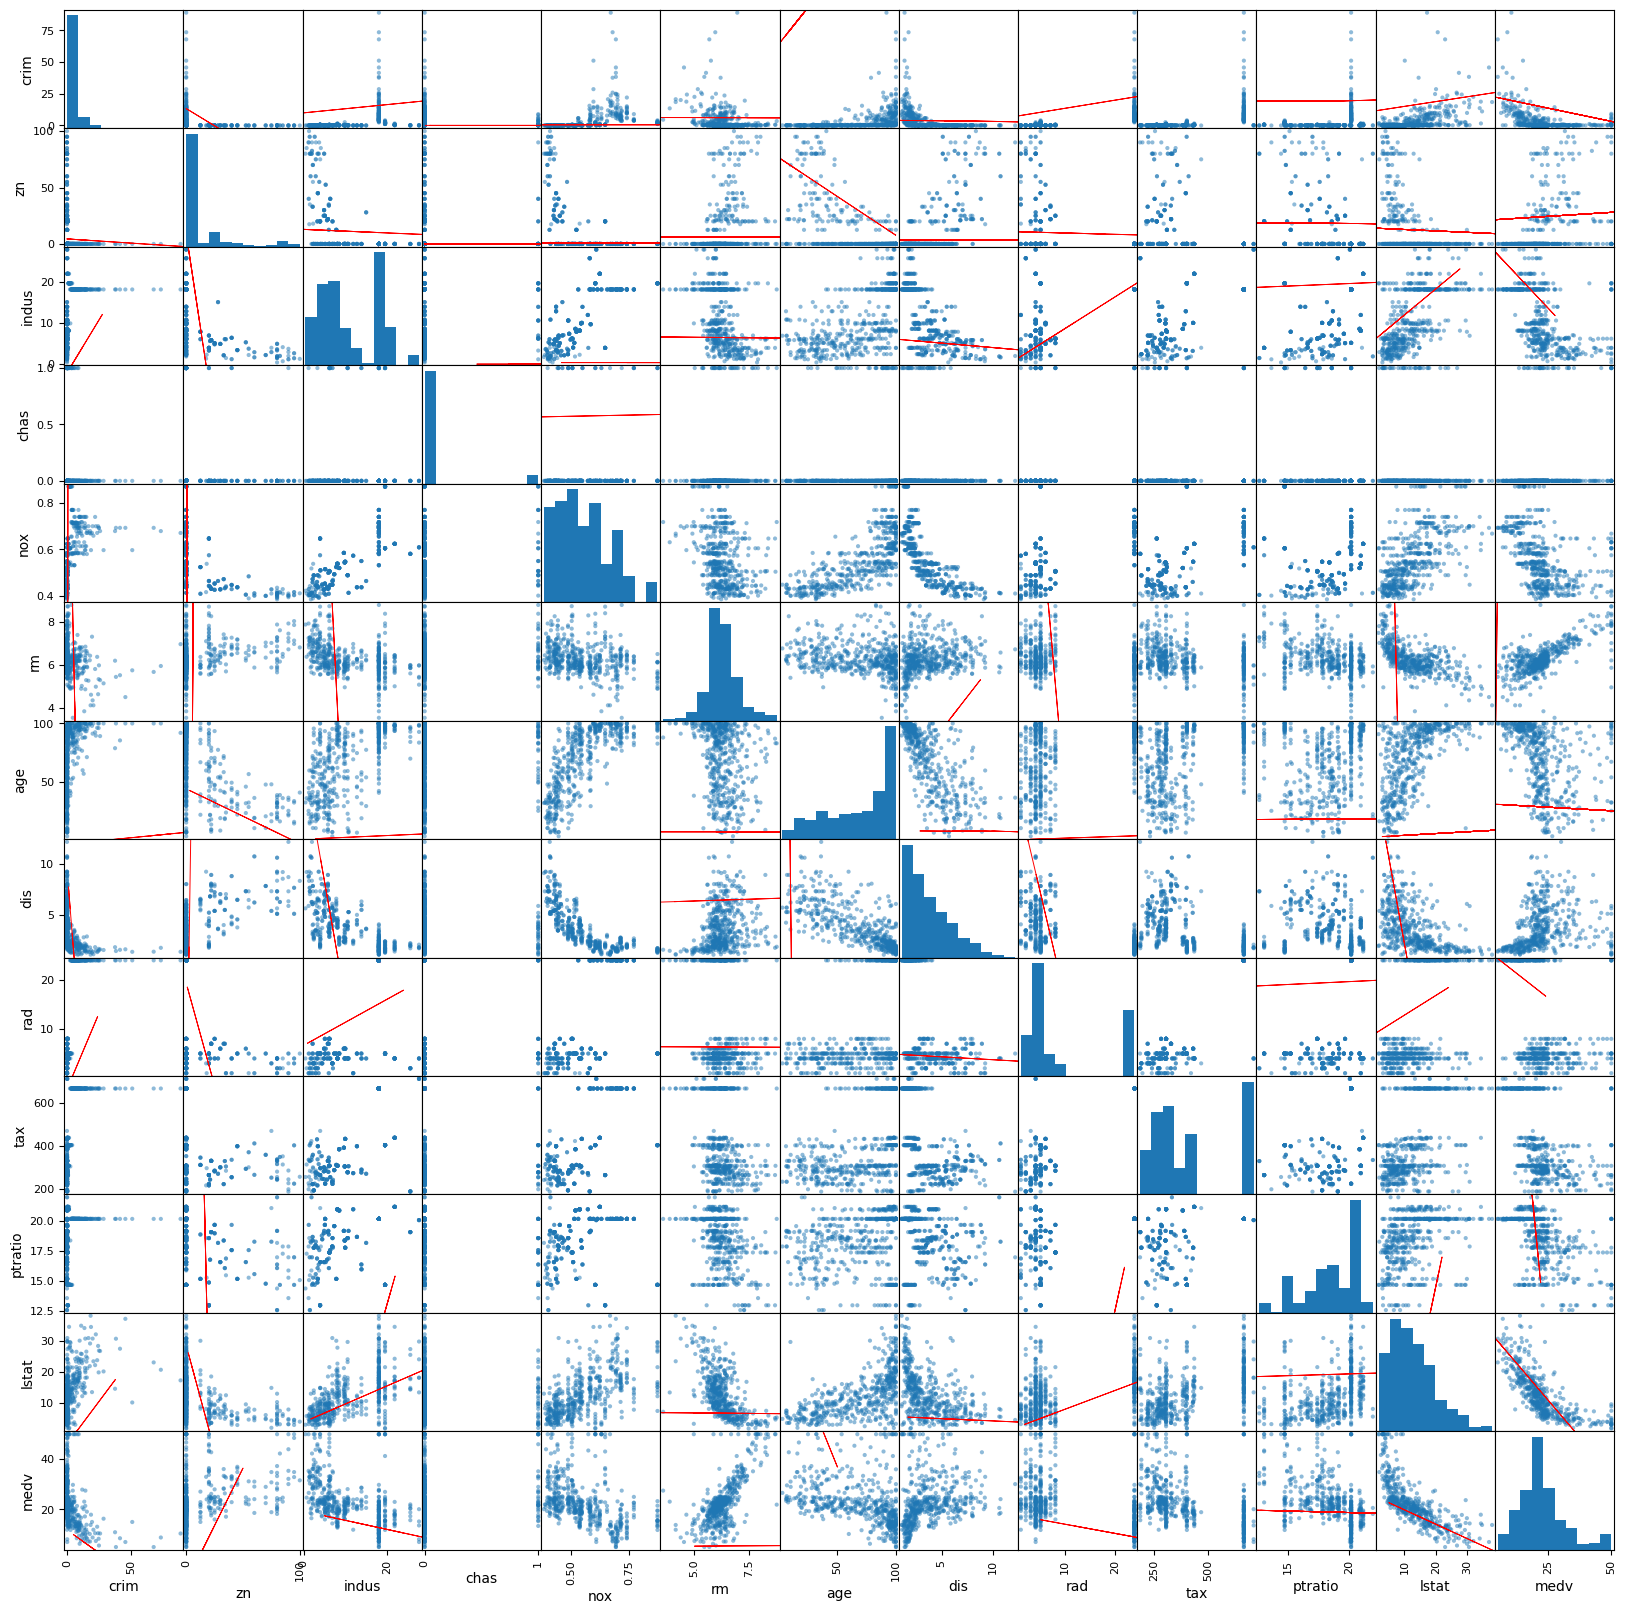

In [7]:
# (c)
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt


axes = scatter_matrix(Boston, figsize=(20, 20), alpha=0.5)

# 加上迴歸線
for i, x_col in enumerate(Boston.columns):
    for j, y_col in enumerate(Boston.columns):
        if i != j:  
            ax = axes[i, j]
            x = Boston[x_col]
            y = Boston[y_col]
            m, b = np.polyfit(x, y, 1)  #
            ax.plot(x, m*x + b, color='red', linewidth=0.7)



In [8]:
# (d) 
# 計算 CRIM 與所有變數的相關性
corr_with_crim = Boston.corr()["crim"].sort_values(ascending=False)
print(corr_with_crim)


crim       1.000000
rad        0.625505
tax        0.582764
lstat      0.455621
nox        0.420972
indus      0.406583
age        0.352734
ptratio    0.289946
chas      -0.055892
zn        -0.200469
rm        -0.219247
dis       -0.379670
medv      -0.388305
Name: crim, dtype: float64


In [11]:
# (e)
print(Boston[["crim","tax","ptratio"]].describe())


high_crim = Boston[Boston["crim"] > Boston["crim"].quantile(0.95)]
high_tax = Boston[Boston["tax"] > Boston["tax"].quantile(0.95)]
high_ptratio = Boston[Boston["ptratio"] > Boston["ptratio"].quantile(0.95)]

print("High CRIM suburbs:", high_crim.shape[0])
print("High TAX suburbs:", high_tax.shape[0])
print("High PTRATIO suburbs:", high_ptratio.shape[0])


             crim         tax     ptratio
count  506.000000  506.000000  506.000000
mean     3.613524  408.237154   18.455534
std      8.601545  168.537116    2.164946
min      0.006320  187.000000   12.600000
25%      0.082045  279.000000   17.400000
50%      0.256510  330.000000   19.050000
75%      3.677083  666.000000   20.200000
max     88.976200  711.000000   22.000000
High CRIM suburbs: 26
High TAX suburbs: 5
High PTRATIO suburbs: 18


### (e) Analysis of High CRIM, TAX, and PTRATIO

- **CRIM (Per Capita Crime Rate)**
  - Range: **0.006 – 88.976**  
  - Mean = 3.61, Median = 0.26, 75% = 3.68  
  - **26 suburbs** exceed the 95th percentile.  
  - Conclusion: The distribution is highly right-skewed. Most suburbs have very low crime rates, but a few suburbs exhibit extremely high crime rates.

- **TAX (Property Tax Rate per $10,000)**
  - Range: **187 – 711**  
  - Mean = 408, Median = 330, 75% = 666  
  - **5 suburbs** exceed the 95th percentile.  
  - Conclusion: Most suburbs have moderate tax rates (200–400), but a handful of suburbs show unusually high tax values.

- **PTRATIO (Pupil-Teacher Ratio by Town)**
  - Range: **12.6 – 22.0**  
  - Mean = 18.46, Median = 19.05, 75% = 20.2  
  - **18 suburbs** exceed the 95th percentile.  
  - Conclusion: The distribution is relatively concentrated, but several suburbs stand out with particularly high pupil-teacher ratios, suggesting limited educational resources.

---

**Overall Comment:**  
All three predictors (CRIM, TAX, PTRATIO) show that the majority of suburbs fall within a reasonable range, while a minority display extreme values. Among them, **CRIM has the most pronounced skewness**, with extreme outliers driving the maximum value far above the average.


In [12]:
# (f)

river_suburbs = Boston[Boston["chas"] == 1].shape[0]
print("Number of suburbs along the Charles River:", river_suburbs)


Number of suburbs along the Charles River: 35


In [13]:
# (g)

median_ptratio = Boston["ptratio"].median()
print("Median PTRATIO:", median_ptratio)


Median PTRATIO: 19.05


In [14]:
# (h)
lowest_medv_row = Boston.loc[Boston["medv"].idxmin()]
print(lowest_medv_row)

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64


### (h) Suburb with the Lowest Median Home Value

- The suburb with the **lowest median value of owner-occupied homes (`medv`)** has a value of **$5,000**.  
- Characteristics of this suburb:  
  - **High crime rate (`crim`)**  
  - **High property tax (`tax`)**  
  - **High pupil-teacher ratio (`ptratio`)**  
  - **High percentage of lower-income households (`lstat`)**  
  - **Low average number of rooms per dwelling (`rm`)**  
- **Comment:**  
  These conditions are consistent with socio-economic reality: higher crime, heavier taxes, poorer education resources, and smaller housing stock are all associated with lower property values. This suburb represents the most disadvantaged neighborhoods in the dataset.


In [15]:
# (e)
more_than_7 = (Boston["rm"] > 7).sum()
more_than_8 = (Boston["rm"] > 8).sum()

print("Suburbs with RM > 7:", more_than_7)
print("Suburbs with RM > 8:", more_than_8)

Suburbs with RM > 7: 64
Suburbs with RM > 8: 13
